In [1]:
import treecorr
import GCRCatalogs
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
%matplotlib inline
from astropy.io import fits
import astropy.units as u
from astropy.coordinates import Angle, Latitude, Longitude
from astropy.coordinates import SkyCoord

In [2]:
filename = '/global/projecta/projectdirs/lsst/groups/CS/cosmoDC2/mass_sheets_behind_z3/cmb_maps/cmblensmap_total_gausshiz_masked.fits'

In [3]:
mapfile = hp.read_map(filename)
print(len(mapfile))

NSIDE = 4096
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
201326592


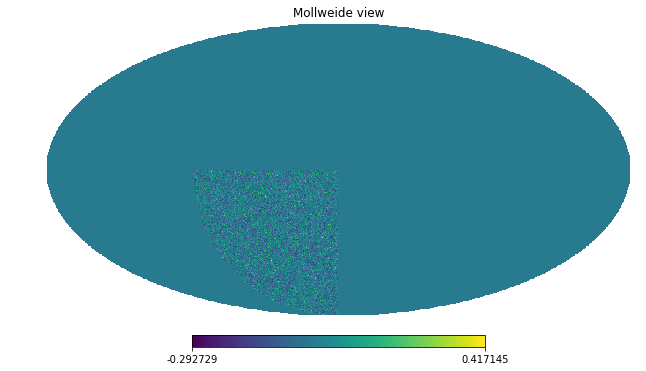

In [4]:
 hp.mollview(mapfile)

In [4]:
index = np.arange(201326592)

In [5]:
theta, phi = hp.pix2ang(nside=4096, ipix=index)
print(len(theta))

201326592


In [7]:
mask_kcmb = (phi>0)*(phi<np.pi/2)*(theta>np.pi/2)
print(True in mask_kcmb)

True


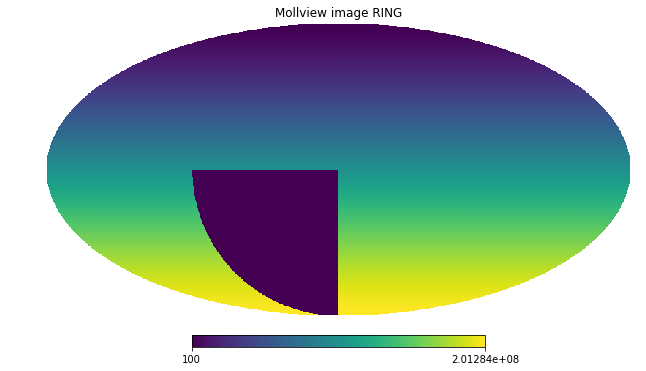

In [8]:
NPIX = 201326592
m = np.arange(NPIX)
m[mask_kcmb] = 100
hp.mollview(m, title="Mollview image RING")

In [9]:
kcmb = mapfile[mask_kcmb]
ra = phi[mask_kcmb]
dec = theta[mask_kcmb]

In [10]:
theta, phi = hp.pix2ang(nside=4096, ipix=index)
theta = np.degrees(theta)
phi = np.degrees(phi)
kcmb = mapfile[index]

In [11]:
gc = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4_small')

In [13]:
data = gc.get_quantities(['ra', 'dec', 'redshift'])

In [13]:
mask1 = (data['redshift']>0.2)*(data['redshift']<0.3) #the foreground number counts

In [12]:
ra0 = data['ra'][mask1]
dec0 = data['dec'][mask1]
print(dec0)

NameError: name 'data' is not defined

In [15]:
mask2 = (ra0>0)*(ra0<90)*(dec0<0)

In [16]:
ra_N = ra0[mask2]
dec_N = dec0[mask2]

In [17]:
cat_N = treecorr.Catalog(ra=ra_N, dec=dec_N, ra_units='deg', dec_units='deg')
cat_K = treecorr.Catalog(ra=phi, dec=theta, k=kcmb, ra_units='rad', dec_units='rad')

In [31]:
nk = treecorr.NKCorrelation(nbins=20, min_sep=2.5/60/180/np.pi, max_sep=250/60/180/np.pi)

In [32]:
nk.process(cat_N,cat_K)       # Compute the cross-correlation function
xi = nk.xi                    # Or access the correlation function directly.

In [33]:
print(data['ra'][mask1])
print(data['dec'][mask1])
print(phi)
print(theta)
print(kcmb)

[61.82843497 61.81854487 61.8370382  ... 65.44377684 65.37081526
 65.40937213]
[-39.03470387 -39.02967575 -39.02289191 ... -39.15142208 -39.15033602
 -39.18218801]
[ 45. 135. 225. ... 135. 225. 315.]
[1.14213399e-02 1.14213399e-02 1.14213399e-02 ... 1.79988579e+02
 1.79988579e+02 1.79988579e+02]
[ 4.71665408e-05  1.29944761e-04 -1.28260261e-04 ... -2.29613204e-02
  3.02606262e-03 -1.59096085e-02]


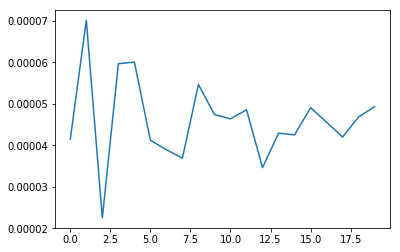

In [34]:
plt.plot(xi)